In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/Users/noahgift/.reml/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("../data/Zip_Zhvi_SingleFamilyResidence.csv")


In [3]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
count,15282.000,15282.000,15282.000,10843.000,10974.000,10998.000,11005.000,11018.000,11018.000,11018.000,...,15232.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000,15282.000
mean,80125.483,46295.286,7641.500,123036.189,122971.396,122955.756,122978.601,123053.295,123168.660,123334.779,...,258309.913,259161.098,260118.846,261045.308,261971.018,262927.640,263803.226,264618.329,265565.816,266395.956
std,30816.445,28934.030,4411.678,78308.265,77822.431,77728.750,77712.302,77681.914,77730.936,77814.034,...,286788.579,287657.252,287840.275,287918.491,288476.692,289147.943,289719.317,290338.071,291066.856,291579.369
min,58196.000,1001.000,1.000,24400.000,23900.000,24200.000,24700.000,24700.000,25100.000,25300.000,...,31800.000,32100.000,31900.000,31200.000,30600.000,30600.000,30900.000,31400.000,32600.000,32700.000
25%,66785.250,21087.750,3821.250,75700.000,75900.000,76000.000,76000.000,76200.000,76225.000,76300.000,...,122100.000,122500.000,123100.000,123700.000,124100.000,124700.000,125100.000,125600.000,126025.000,126500.000
50%,77175.000,44306.500,7641.500,104300.000,104450.000,104500.000,104600.000,104900.000,105000.000,105100.000,...,176800.000,177400.000,178300.000,179200.000,179900.000,180600.000,181300.000,182000.000,182500.000,183100.000
75%,88700.500,70399.500,11461.750,147100.000,147200.000,147100.000,147400.000,147475.000,147575.000,147600.000,...,288425.000,289200.000,290300.000,291375.000,292300.000,293400.000,294800.000,296000.000,297400.000,298750.000
max,738092.000,99901.000,15282.000,1769000.000,1768100.000,1766900.000,1764200.000,1762200.000,1762600.000,1763900.000,...,6299300.000,6360300.000,6336400.000,6255500.000,6294300.000,6403700.000,6468900.000,6489100.000,6492000.000,6475600.000


In [4]:
median_prices = df.median()

In [7]:
median_prices.tail()

2017-05   180600.000
2017-06   181300.000
2017-07   182000.000
2017-08   182500.000
2017-09   183100.000
dtype: float64

In [11]:
type(median_prices)


pandas.core.series.Series

/Users/noahgift/.reml/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


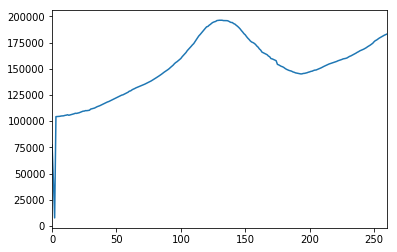

In [12]:
ax = sns.tsplot(data=median_prices)